In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3

In [45]:
# Create database connection
conn = sqlite3.connect('data/hiking.db')

query = "SELECT length FROM Trail"
trail = pd.read_sql_query(query, conn)

conn.close()

# Define the group boundaries
bins = [0, 4, 8, 12, 15, float('inf')]
labels = ['<4', '4-8', '8-12', '12-15', '>15']

# Group the data
trail['group'] = pd.cut(trail['length'], bins=bins, labels=labels, right=False)

# Calculate the count for each group
group_counts = trail['group'].value_counts().sort_index().reset_index()
group_counts.columns = ['labels', 'group_counts']

# Create the bar chart
fig = px.bar(group_counts, x='labels', y='group_counts', color_discrete_sequence=['skyblue'])
fig.update_layout(title='Trail Length Distribution', 
                  xaxis_title='Length Group (km)', 
                  yaxis_title='Trail Count', 
                  width=600,
                  height=400)
fig.show()

In [48]:
import plotly.express as px

# Connect to the database
conn = sqlite3.connect('data/hiking.db')

# Query the data
query1 = '''
SELECT p.park_name, COUNT(t.trail_name) AS trail_count
FROM Trail AS t
JOIN Park AS p ON t.park_id = p.park_id
GROUP BY p.park_name
ORDER BY trail_count DESC
'''

data = pd.read_sql_query(query1, conn)

# Create the stacked bar chart
fig = px.bar(data, x='park_name', y='trail_count', color_discrete_sequence=['skyblue'])
fig.update_layout(title='Trail Count by Park', 
                  xaxis_title='Country Park', 
                  yaxis_title='Trail Count')
fig.show()


In [47]:
# Connect to the database
conn = sqlite3.connect('data/hiking.db')

# Read difficulty data from the Trail table and perform group count
query3 = '''
SELECT 
    CASE 
        WHEN difficulty = '1' THEN 'Easy'
        WHEN difficulty = '2' THEN 'Moderate'
        WHEN difficulty = '3' THEN 'Demanding'
        WHEN difficulty = '4' THEN 'Difficult'
        WHEN difficulty = '5' THEN 'Very Difficult'
    END AS difficulty_label,
    COUNT(*) AS count
FROM Trail
GROUP BY difficulty
'''

trail_difficulty = pd.read_sql_query(query3, conn)

# Close the database connection
conn.close()

colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple']

# Create the pie chart using Plotly
fig = px.pie(trail_difficulty, values='count', names='difficulty_label', color_discrete_sequence=colors)
fig.update_layout(title='Trail Difficulty Distribution', 
                  width=600,
                  height=400)
fig.show()

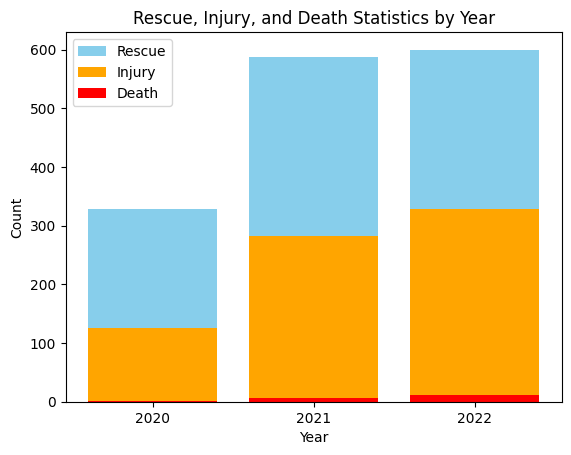

In [40]:
# Connect to the database
conn = sqlite3.connect('data/hiking.db')

# Read rescue, injury, and death statistics from the Rescue table and perform group count by year
query4 = '''
SELECT year,
       SUM(rescue_count) AS total_rescue_count,
       SUM(injury_count) AS total_injury_count,
       SUM(death_count) AS total_death_count
FROM Rescue
GROUP BY year
'''

rescue_stats = pd.read_sql_query(query4, conn)

# Close the database connection
conn.close()

# Create the line chart
plt.bar(rescue_stats['year'], rescue_stats['total_rescue_count'], label='Rescue', color='skyblue')
plt.bar(rescue_stats['year'], rescue_stats['total_injury_count'], label='Injury', color='orange')
plt.bar(rescue_stats['year'], rescue_stats['total_death_count'], label='Death', color='red')

# Add title and labels
plt.title('Rescue, Injury, and Death Statistics by Year')
plt.xlabel('Year')
plt.ylabel('Count')


plt.legend()
plt.xticks(rescue_stats['year'])
plt.show()

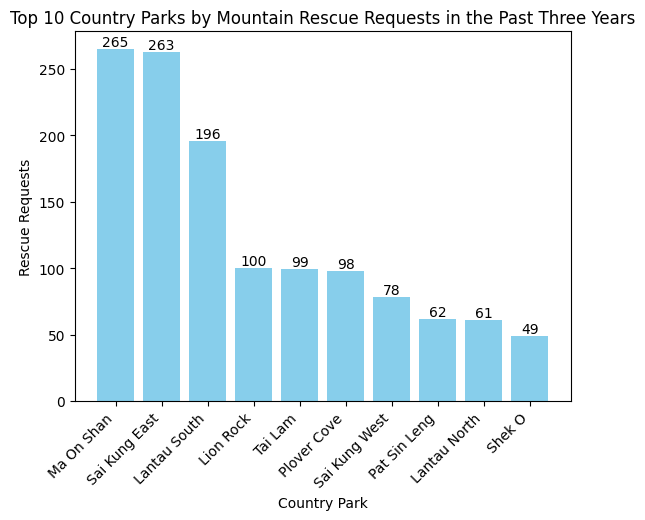

In [41]:
# 连接到数据库
conn = sqlite3.connect('data/hiking.db')

# 查询公园的山地救援请求数量
query5 = '''
SELECT p.park_name, SUM(r.rescue_count) AS total_rescue_count
FROM Park AS p
JOIN Rescue AS r ON p.park_id = r.park_id
GROUP BY p.park_name
ORDER BY total_rescue_count DESC
LIMIT 10
'''

park_rescue_stats = pd.read_sql_query(query5, conn)

# 关闭数据库连接
conn.close()

# 创建条形图
plt.bar(park_rescue_stats['park_name'], park_rescue_stats['total_rescue_count'], color='skyblue')

# 添加数值标签
for i, count in enumerate(park_rescue_stats['total_rescue_count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

# 添加标题和标签
plt.title('Top 10 Country Parks by Mountain Rescue Requests in the Past Three Years')
plt.xlabel('Country Park')
plt.ylabel('Rescue Requests')
plt.xticks(rotation=45, ha='right')
plt.show()

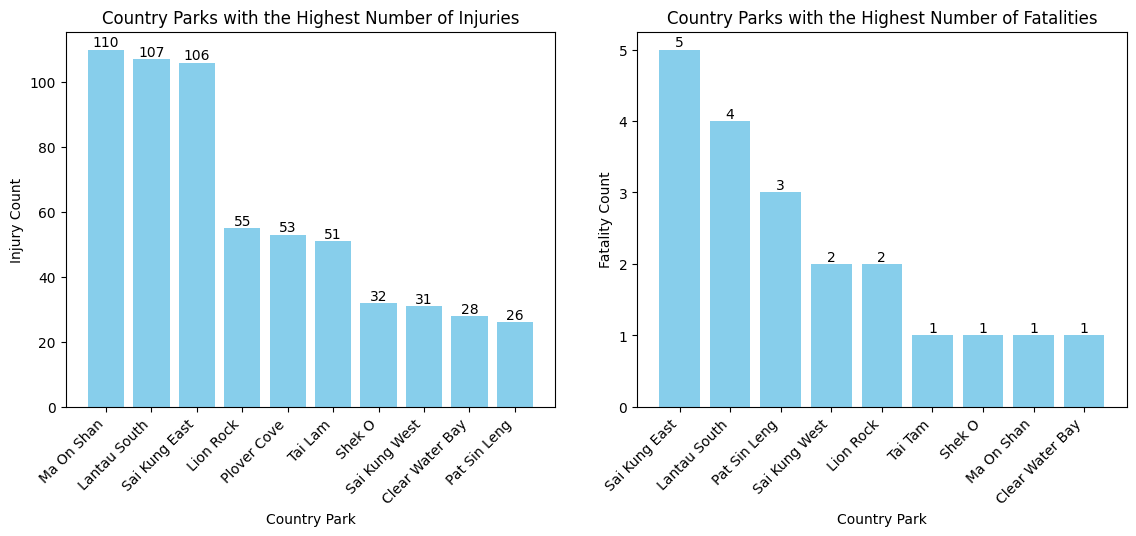

In [42]:
# 连接到数据库
conn = sqlite3.connect('data/hiking.db')

# 查询受伤人数最多的国家公园
injury_query = '''
SELECT p.park_name, SUM(r.injury_count) AS total_injuries
FROM Park AS p
JOIN Rescue AS r ON p.park_id = r.park_id
GROUP BY p.park_name
ORDER BY total_injuries DESC
LIMIT 10
'''

injury_stats = pd.read_sql_query(injury_query, conn)

# 查询死亡人数最多的国家公园
fatality_query = '''
SELECT p.park_name, SUM(r.death_count) AS total_fatalities
FROM Park AS p
JOIN Rescue AS r ON p.park_id = r.park_id
GROUP BY p.park_name
ORDER BY total_fatalities DESC
LIMIT 9
'''

fatality_stats = pd.read_sql_query(fatality_query, conn)

# 关闭数据库连接
conn.close()

# 调整图形大小
plt.figure(figsize=(12, 6))

# 创建受伤人数最多的国家公园表
plt.subplot(1, 2, 1)
bar1 = plt.bar(injury_stats['park_name'], injury_stats['total_injuries'], color='skyblue')
plt.title('Country Parks with the Highest Number of Injuries')
plt.xlabel('Country Park')
plt.ylabel('Injury Count')
plt.xticks(rotation=45, ha='right')

# 在每个条形上方显示数值标签
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# 创建死亡人数最多的国家公园表
plt.subplot(1, 2, 2)
bar2 = plt.bar(fatality_stats['park_name'], fatality_stats['total_fatalities'], color='skyblue')
plt.title('Country Parks with the Highest Number of Fatalities')
plt.xlabel('Country Park')
plt.ylabel('Fatality Count')
plt.xticks(rotation=45, ha='right')

# 在每个条形上方显示数值标签
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout(pad=3)
plt.show()